In [1]:
# 1️⃣ 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 머신러닝용 라이브러리
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [2]:
# 2️⃣ 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Train 데이터 크기:", train.shape)
print("Test 데이터 크기:", test.shape)

Train 데이터 크기: (6818, 12)
Test 데이터 크기: (1705, 11)


In [3]:

# 3️⃣ 데이터 기본 확인
display(train.head())
display(train.info())
display(train.describe())
display(train.describe(include='O'))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCR06,12.500,Low Fat,0.006760,Household,42.8112,OUT013,1987,High,Tier 3,Supermarket Type1,639.1680
1,FDW11,12.600,Low Fat,0.048741,Breads,60.4194,OUT013,1987,High,Tier 3,Supermarket Type1,990.7104
2,FDH32,12.800,Low Fat,0.075997,Fruits and Vegetables,97.1410,OUT013,1987,High,Tier 3,Supermarket Type1,2799.6890
3,FDL52,6.635,Regular,0.046351,Frozen Foods,37.4506,OUT017,2007,NaN,Tier 2,Supermarket Type1,1176.4686
4,FDO09,13.500,Regular,0.125170,Snack Foods,261.4910,OUT013,1987,High,Tier 3,Supermarket Type1,3418.8830


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5656 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4878 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Item_Outlet_Sales          6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


None

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5656.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.872703,0.066121,140.419533,1997.885890,2190.941459
std,4.651034,0.051383,62.067861,8.339795,1706.131256
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026914,93.610050,1987.000000,836.577700
50%,12.600000,0.053799,142.448300,1999.000000,1806.648300
75%,17.000000,0.095273,185.060150,2004.000000,3115.944000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,6818,6818,6818,6818,4878,6818,6818
unique,1554,5,16,10,3,3,4
top,FDW26,Low Fat,Snack Foods,OUT046,Medium,Tier 3,Supermarket Type1
freq,9,4092,963,763,2228,2664,4474


In [4]:
# 4️⃣ 결측치 확인
print("\ntrain 결측치 합계:\n", train.isnull().sum())
print("\ntest 결측치 합계:\n", test.isnull().sum())


train 결측치 합계:
 Item_Identifier                 0
Item_Weight                  1162
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1940
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

test 결측치 합계:
 Item_Identifier                0
Item_Weight                  301
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  470
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64


In [5]:
# 5️⃣ 결측치 채우기
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].min())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].min())
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [6]:
# 6️⃣ 범주형 값 분포
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in cat_cols:
    print(f"\n[{col}] 값 분포:")
    print(train[col].value_counts())


[Item_Fat_Content] 값 분포:
Item_Fat_Content
Low Fat    4092
Regular    2287
LF          256
reg          96
low fat      87
Name: count, dtype: int64

[Item_Type] 값 분포:
Item_Type
Snack Foods              963
Fruits and Vegetables    960
Household                728
Frozen Foods             701
Dairy                    561
Baking Goods             522
Canned                   517
Health and Hygiene       416
Meat                     350
Soft Drinks              345
Breads                   190
Hard Drinks              171
Others                   137
Starchy Foods            115
Breakfast                 92
Seafood                   50
Name: count, dtype: int64

[Outlet_Size] 값 분포:
Outlet_Size
Medium    4168
Small     1925
High       725
Name: count, dtype: int64

[Outlet_Location_Type] 값 분포:
Outlet_Location_Type
Tier 3    2664
Tier 2    2249
Tier 1    1905
Name: count, dtype: int64

[Outlet_Type] 값 분포:
Outlet_Type
Supermarket Type1    4474
Grocery Store         853
Supermarket Type3    

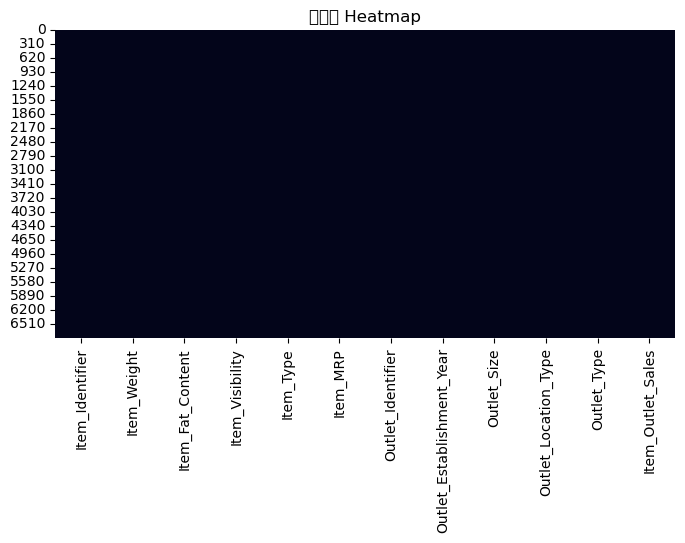

In [7]:
# 7️⃣ 결측 시각화
plt.figure(figsize=(8,4))
sns.heatmap(train.isnull(), cbar=False)
plt.title("결측치 Heatmap")
plt.show()

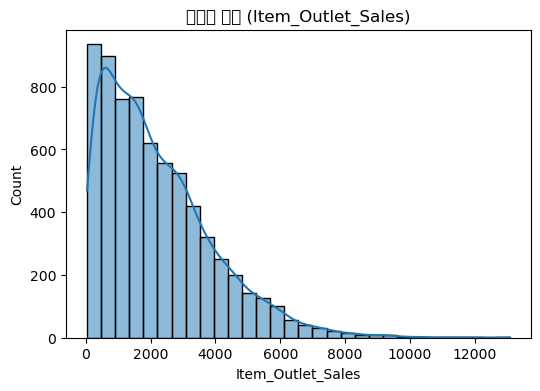

In [8]:
# 8️⃣ 판매액 분포 확인
plt.figure(figsize=(6,4))
sns.histplot(train['Item_Outlet_Sales'], bins=30, kde=True)
plt.title("판매액 분포 (Item_Outlet_Sales)")
plt.show()

In [9]:
# 9️⃣ 타깃 분리
target = train.pop('Item_Outlet_Sales')

In [10]:
# 10️⃣ Label Encoding
cols = train.columns[train.dtypes == object]
for col in cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]], axis=0))
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

In [11]:
# 11️⃣ 불필요한 컬럼 제거
train.drop('Item_Identifier', axis=1, inplace=True)
test.drop('Item_Identifier', axis=1, inplace=True)

In [12]:
# 12️⃣ 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train,
    target,
    test_size=0.2,
    random_state=42
)
print("Train/Val 크기:", X_train.shape, X_val.shape)

Train/Val 크기: (5454, 10) (1364, 10)


In [19]:
# 선형회귀 (OLS)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

In [15]:
# 평가
lr_mse = mean_squared_error(y_val, y_pred)
lr_mae = mean_absolute_error(y_val, y_pred)
lr_rmse = root_mean_squared_error(y_val, y_pred)
lr_r2 = r2_score(y_val, y_pred)

print("\n🔹 [Linear Regression 평가결과]")
print(f"MSE  : {lr_mse:.3f}")
print(f"MAE  : {lr_mae:.3f}")
print(f"RMSE : {lr_rmse:.3f}")
print(f"R²   : {lr_r2:.3f}")


🔹 [Linear Regression 평가결과]
MSE  : 1422195.207
MAE  : 884.231
RMSE : 1192.558
R²   : 0.524


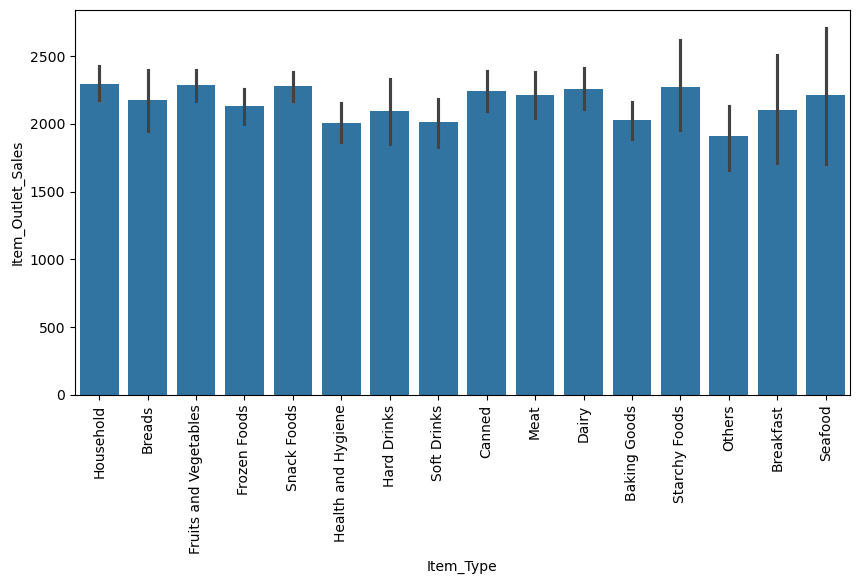

In [20]:
# Item_Type별 평균 판매액 시각화
# (인코딩 전 원래 이름 확인용 - 원래 컬럼 따로 불러오기)
raw_train = pd.read_csv('train.csv')

plt.figure(figsize=(10,5))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=raw_train, estimator=np.mean)
plt.xticks(rotation=90)
plt.title("")
plt.show()

In [13]:
# 선형회귀 (OLS)
# LinearRegression을 사용해 종속변수(Item_Outlet_Sales)를 독립변수들로 예측
lr = LinearRegression()           # 선형회귀 모델 객체 생성
lr.fit(X_train, y_train)          # 학습 데이터를 이용해 모델 학습
y_pred = lr.predict(X_val)        # 검증 데이터(X_val)로 판매액 예측

# 평가
# 예측 결과(y_pred)와 실제 값(y_val)을 비교하여 성능 평가
lr_mse = mean_squared_error(y_val, y_pred)  # 평균제곱오차(MSE) - 오차 제곱 평균
lr_mae = mean_absolute_error(y_val, y_pred) # 평균절대오차(MAE) - 오차 절댓값 평균
lr_rmse = root_mean_squared_error(y_val, y_pred) # RMSE - MSE에 루트 씌운 값, 단위 동일
lr_r2 = r2_score(y_val, y_pred)             # 결정계수(R²) - 예측 설명력 지표

# 평가 결과 출력
print("\n🔹 [Linear Regression 평가결과]")
print(f"MSE  : {lr_mse:.3f}")   # 오차가 작을수록 좋음
print(f"MAE  : {lr_mae:.3f}")   # 오차가 작을수록 좋음
print(f"RMSE : {lr_rmse:.3f}")  # 오차가 작을수록 좋음
print(f"R²   : {lr_r2:.3f}")    # 1에 가까울수록 모델 설명력이 좋음




🔹 [Linear Regression 평가결과]
MSE  : 1422195.207
MAE  : 884.231
RMSE : 1192.558
R²   : 0.524


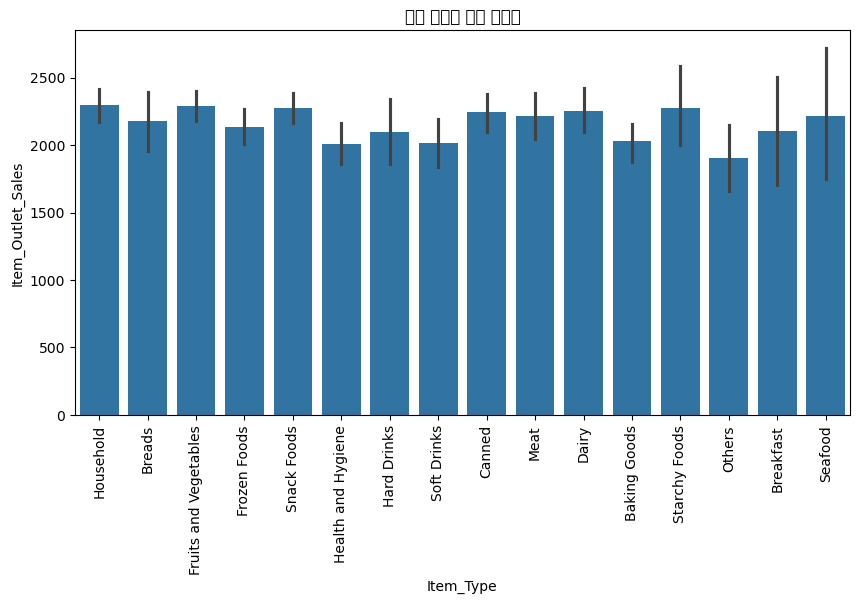

In [14]:
# Item_Type별 평균 판매액 시각화
# 'Item_Type'별 판매액 평균을 막대그래프로 시각화
# 원래 이름을 보기 위해 인코딩 전 데이터(raw_train) 사용
raw_train = pd.read_csv('train.csv')  

plt.figure(figsize=(10,5))  # 그래프 크기 설정
sns.barplot(
    x='Item_Type',           # x축: 상품 종류
    y='Item_Outlet_Sales',   # y축: 판매액
    data=raw_train,          # 데이터
    estimator=np.mean        # 각 상품 종류의 평균 판매액 계산
)
plt.xticks(rotation=90)      # x축 글자를 90도 회전 (겹치지 않게)
plt.title("상품 종류별 평균 판매액")  # 그래프 제목
plt.show()                  # 그래프 출력

In [10]:
# 11️⃣ 평가 (MSE, MAE, RMSE, R2)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("\n[모델 성능 평가]")
print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2 : {r2:.4f}")


[모델 성능 평가]
MSE : 1258220.34
MAE : 858.96
RMSE : 1121.70
R2 : 0.5153


/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


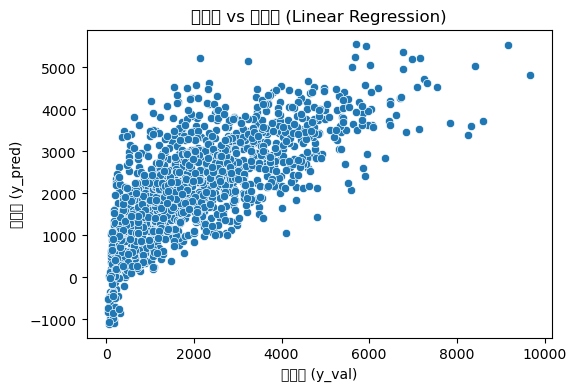

In [11]:
# 12️⃣ 시각화 (실제값 vs 예측값)
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_val, y=y_pred)
plt.xlabel("실제값 (y_val)")
plt.ylabel("예측값 (y_pred)")
plt.title("실제값 vs 예측값 (Linear Regression)")
plt.show()

In [1]:
import pandas as pd
import statsmodels.api as sm

train = pd.read_csv('train.csv')

# 결측치 제거 또는 채우기
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].min())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

# 독립변수(X), 종속변수(y)
X = pd.get_dummies(train['Item_Type'], drop_first=True)  # 범주형 변수 더미화
y = train['Item_Outlet_Sales']

# 상수항 추가
X = sm.add_constant(X)

# OLS 회귀분석
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

ImportError: cannot import name '_lazywhere' from 'scipy._lib._util' (/opt/conda/lib/python3.11/site-packages/scipy/_lib/_util.py)

In [ ]:
# 결측치 제거 또는 채우기
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].min())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [ ]:
# 독립변수(X), 종속변수(y)
X = pd.get_dummies(train['Item_Type'], drop_first=True)  # 범주형 변수 더미화
y = train['Item_Outlet_Sales']

In [ ]:
# 상수항 추가
X = sm.add_constant(X)

In [ ]:
# OLS 회귀분석
model = sm.OLS(y, X).fit()

In [2]:
# 결과 출력
print(model.summary())

NameError: name 'model' is not defined

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train)
plt.xticks(rotation=90)
plt.title('Item_Type vs Item_Outlet_Sales')
plt.show()


NameError: name 'train' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
avg_sales = train.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=avg_sales.index, y=avg_sales.values)
plt.xticks(rotation=90)
plt.ylabel('Average Item_Outlet_Sales')
plt.title('Average Sales by Item_Type')
plt.show()
